In [1]:
import os
import random
from IPython.display import Image, display

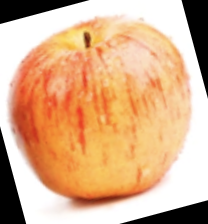

In [2]:
import os
import random
from IPython.display import Image, display

# Path to your image folder (Windows)
folder_path = r'C:\Users\nandu\fruites\images\Apple__Healthy'

# List all image files
image_files = [f for f in os.listdir(folder_path) 
               if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image
selected_image = random.choice(image_files)

# Display the image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

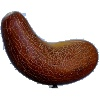

In [3]:
# Specify the path to your image folder
folder_path = r'C:\Users\nandu\fruites\images\Cucumber__Rotten'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

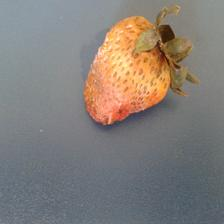

In [4]:
# Specify the path to your image folder
folder_path = r'C:\Users\nandu\fruites\images\Strawberry__Rotten'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

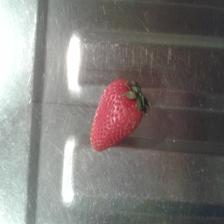

In [5]:
# Specify the path to your image folder
folder_path =  r'C:\Users\nandu\fruites\images\Strawberry__Healthy'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) 
               if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
trainpath = r"C:\Users\nandu\fruites\dataset\train"
testpath  = r"C:\Users\nandu\fruites\dataset\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
    trainpath,
    target_size=(224, 224),
    batch_size=20
)

test = test_datagen.flow_from_directory(
    testpath,
    target_size=(224, 224),
    batch_size=20
)

Found 23415 images belonging to 28 classes.
Found 5862 images belonging to 28 classes.


In [ ]:
!pip install tensorflow

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load VGG16 without top layers
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

# Print all layers
for layer in vgg.layers:
    print(layer)

# Number of layers
len(vgg.layers)

# Freeze VGG16 layers
for layer in vgg.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(vgg.output)
output = Dense(28, activation='softmax')(x)

# Create final model
vgg16 = Model(vgg.input, output)

# Model summary
vgg16.summary()

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
import os
import shutil
import random

# Paths
source_dir = r'C:\Users\nandu\fruites\images'
base_dir   = r'C:\Users\nandu\fruites\dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir  = os.path.join(base_dir, 'test')

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Train-test split ratio
split_ratio = 0.8  # 80% train, 20% test

# Loop through each class folder
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)

    split_index = int(len(images) * split_ratio)

    train_images = images[:split_index]
    test_images  = images[split_index:]

    # Create class folders
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Copy images to train
    for img in train_images:
        shutil.copy(
            os.path.join(class_path, img),
            os.path.join(train_dir, class_name, img)
        )

    # Copy images to test
    for img in test_images:
        shutil.copy(
            os.path.join(class_path, img),
            os.path.join(test_dir, class_name, img)
        )

    print(f"{class_name}: {len(train_images)} train | {len(test_images)} test")

print("✅ Train-test split completed!")

Apple__Healthy: 1950 train | 488 test
Apple__Rotten: 2344 train | 586 test
Banana__Healthy: 1600 train | 400 test



KeyboardInterrupt



In [11]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Compile the model (you may have already done this)
vgg16.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping callback
history = vgg16.fit(
    train,
    validation_data=test,
    epochs=15,
    steps_per_epoch=20,
    callbacks=[early_stopping]
)

vgg16.save('healthy_vs_rotten')

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3637 - loss: 3.2001   

C:\Users\nandu\anaconda3\envs\sign\lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1269s 66s/step - accuracy: 0.3661 - loss: 3.1884 - val_accuracy: 0.5003 - val_loss: 2.1475
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1176s 62s/step - accuracy: 0.5166 - loss: 2.3064 - val_accuracy: 0.5887 - val_loss: 1.5118
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1201s 63s/step - accuracy: 0.5722 - loss: 1.8267 - val_accuracy: 0.5899 - val_loss: 2.0533
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1183s 62s/step - accuracy: 0.6378 - loss: 1.6366 - val_accuracy: 0.5887 - val_loss: 1.4746
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1198s 63s/step - accuracy: 0.6023 - loss: 1.4760 - val_accuracy: 0.6805 - val_loss: 1.2567
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1212s 64s/step - accuracy: 0.6602 - loss: 1.5229 - val_accuracy: 0.7050 - val_loss: 1.0736
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1598s 84s/step - accuracy: 0.6698 - loss: 1.2593 - val_accuracy: 0.6894 - val_loss: 1.0874
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4478s 235s/step - accuracy: 0.7311 - loss: 0.9805 - val_accuracy: 0.68

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=healthy_vs_rotten.

In [12]:
vgg16.save('healthy_vs_rotten.h5')

In [13]:
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

In [20]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np
img_path = r"C:\Users\nandu\fruites\dataset\train\Bellpepper__Healthy\freshPepper (2).jpg"

import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

labels[np.argmax(preds)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


26

In [21]:
labels[np.argmax(preds)]

26

In [22]:
img_path = r"C:\Users\nandu\fruites\dataset\train\Orange__Healthy\freshOrange (5).jpg"

import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)

preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.0000000e+00, 1.2752811e-10, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.5207601e-38, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [23]:
img_path = r"C:\Users\nandu\fruites\dataset\train\Guava__Rotten\RottenGuava (11).jpg"
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)

preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.9549751e-27, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.2514098e-36, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [24]:
labels[np.argmax(preds)]

0

In [25]:
img_path = r"C:\Users\nandu\fruites\dataset\train\Cucumber__Rotten\rottenCucumber (4).jpg"

import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)

preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
labels[np.argmax(preds)]

3

In [27]:
train.class_indices

{'Apple__Healthy': 0,
 'Apple__Rotten': 1,
 'Banana__Healthy': 2,
 'Banana__Rotten': 3,
 'Bellpepper__Healthy': 4,
 'Bellpepper__Rotten': 5,
 'Carrot__Healthy': 6,
 'Carrot__Rotten': 7,
 'Cucumber__Healthy': 8,
 'Cucumber__Rotten': 9,
 'Grape__Healthy': 10,
 'Grape__Rotten': 11,
 'Guava__Healthy': 12,
 'Guava__Rotten': 13,
 'Jujube__Healthy': 14,
 'Jujube__Rotten': 15,
 'Mango__Healthy': 16,
 'Mango__Rotten': 17,
 'Orange__Healthy': 18,
 'Orange__Rotten': 19,
 'Pomegranate__Healthy': 20,
 'Pomegranate__Rotten': 21,
 'Potato__Healthy': 22,
 'Potato__Rotten': 23,
 'Strawberry__Healthy': 24,
 'Strawberry__Rotten': 25,
 'Tomato__Healthy': 26,
 'Tomato__Rotten': 27}

In [28]:
class_names = {v: k for k, v in train.class_indices.items()}
class_names

{0: 'Apple__Healthy',
 1: 'Apple__Rotten',
 2: 'Banana__Healthy',
 3: 'Banana__Rotten',
 4: 'Bellpepper__Healthy',
 5: 'Bellpepper__Rotten',
 6: 'Carrot__Healthy',
 7: 'Carrot__Rotten',
 8: 'Cucumber__Healthy',
 9: 'Cucumber__Rotten',
 10: 'Grape__Healthy',
 11: 'Grape__Rotten',
 12: 'Guava__Healthy',
 13: 'Guava__Rotten',
 14: 'Jujube__Healthy',
 15: 'Jujube__Rotten',
 16: 'Mango__Healthy',
 17: 'Mango__Rotten',
 18: 'Orange__Healthy',
 19: 'Orange__Rotten',
 20: 'Pomegranate__Healthy',
 21: 'Pomegranate__Rotten',
 22: 'Potato__Healthy',
 23: 'Potato__Rotten',
 24: 'Strawberry__Healthy',
 25: 'Strawberry__Rotten',
 26: 'Tomato__Healthy',
 27: 'Tomato__Rotten'}

In [29]:
import json

with open("class_names.json", "w") as f:
    json.dump(class_names, f)